In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from pathlib import Path
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

### Import training data

In [2]:
path      = Path('../input')
train_df  = pd.read_csv(path/'train.csv')

var_names = [col for col in train_df if 'var_' in col]

### Define peak finding function on histogram of a series

This function uses the `find_peaks` function from `scipy.signal` which takes various parameters describing constraints on the peaks that you wish to find. I have specified values for `prominence` and `width` to try and highlight the spikes in the density rather than just the peak of the distribution.

In [5]:
def count_dist_peaks(series, bins, prominence, width):
    count, division = np.histogram(series, bins=bins)
    peaks, props = find_peaks(count, prominence=prominence, width=width)
    return peaks

#### Get a list of peaks for the series that have them

In [6]:
peak_dic = {col:count_dist_peaks(train_df[col].values, bins=100, prominence=700,width=[0,10]) for col in var_names}
non_empty_peaks = {k:v for k,v in peak_dic.items() if len(v) > 0}

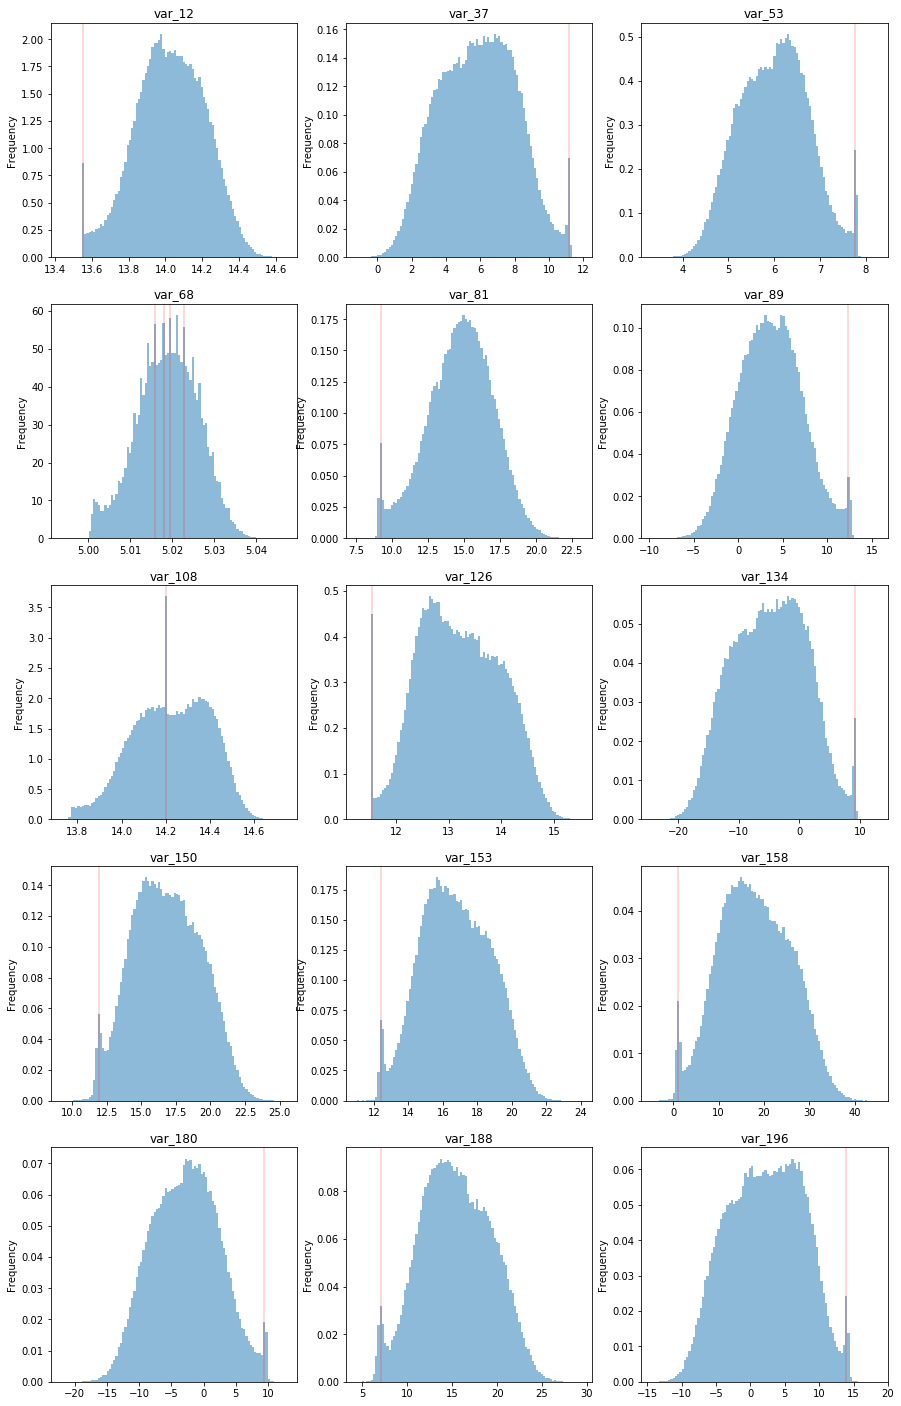

In [7]:
var_count = len(non_empty_peaks)
cols      = 3
rows      = var_count//cols + 0 if var_count % cols == 0 else 1

f, axes = plt.subplots(rows,cols, figsize=(5*cols, 5*rows))

for i,(k,v) in enumerate(non_empty_peaks.items()):
    count, division = np.histogram(train_df[k].values, bins=100)
    ax=axes[i //3,i % 3]
    train_df[k].plot.hist(bins=100, alpha=0.5, density=True, title=k,ax=ax)
    for p in v:
        ax.axvline(x=(division[p]+division[p+1])/2,c='red',alpha=0.2)